# VERİ ÖN İSLEME

In [4]:
# Veriyi elde etmek veritabanlarından uygun hale getirmek
# Elimize gelen bu veriyi manipülatif işlemlerle ele almak bunları düzenleyip istediğimiz forma getirmek
# Bununla beraber modellemeye başlamadan önce veriseti içerisindeki 
#bozuklukları, aykırılıkları,eksiklikleri giderip modellemeye hazır hale getirmek diğer yönüdür.

# NOT: Bunların tamamını veri ön isleme olarak düsünebiliriz.
    

* Veri Ön İşleme
    - Veri Ön İşleme Genel Bakıs
    - Aykırı Gözlem Analizi
    - Eksik Gözlem Analizi
    - Standartlaştırma
    - Değişken Dönüşümleri




* Veri Ön İşleme Genel Bakış
    - Veri Temizleme(data cleaning/cleasing)
        - Gürültülü Veri
        - Eksik Veri Analizi
        - Aykırı Gözlem Analizi
    - Veri Standardizasyonu
        - 0-1 Dönüşümü
        - z- skoruna Dönüştürme
        - Logaritmik Dönüşüm
    - Veri İndirgeme
        - Gözlem Sayısının Azaltılması
        - Degişken sayısının Azaltılması
    - Değişken Dönüşümleri 
        - Sürekli Değişkenlerde Dönüşümler
        - Kategorik Değişkenlerde Dönüşümler
    - Değişken Mühendisliği
        -elimizdeki değişkenlerden bazı çaprazlamalarla yeni değişkenler olusturmak 

* Gürültülü Veri
   - Veri Kaynağına Bağlı Hatalar
        - (anketler,veri tabanları, ara unsurlar)
   - Tutarsızlık
        - (Cinsiyet =Erkek, Gebelik Durumu=1,
    
        - Kategori=Biberon, Fiyat=900 Bin tl,
        - Vasıta Türü= Otomobil, Motor Gücü=25 HP)
   - Kayıtlarda Çoklama
   sadece bir defa kayıtlarda bulunması gereken bir gözlem biriminin birden fazla defa aynı bilgiyi taşıyarak bulunması durumunu ifade eder.  

# Aykırı Değer Nedir?
* Aykırılığı ifade eden numerik değere aykırı değer denir.

# Aykırı Gözlem Analizi
* Veride genel eğilimin oldukça dışına çıkan yada diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.

# Aykırı Gözlem Nedir?
Aykırı değeri barındıran gözlem birimine aykırı gözlem denir.

* Örneğin ; yaş ve boşanma değişkenini ele alalım
* yas 20 olup bosanma sayısı 3 olması aykırı gözlem ( outlier deger) olarak ele alınacaktır.

## Aykırı Değer Neye Sebep Olur?
* Genellenebilirlik kaygısı ile olusturulan kural setlerini ya da fonksiyonları yanıltır.Yanlılığa sabep olur

In [5]:
# Anlamlı olan iliskileri anlamsız , ilişkilerin yönü ile ilgili olan bilgileri de 
# yanıltıcı bir şekilde aykırı gözlemler verebilir.


# Makine öğrenmesinde amacımız örnek veri setleri üzerinden genellenebilirlik arayışı 
#ile uygun kural setleri yada fonksiyonel yapıları ortaya
#çıkarılmasıdır. 
# Aykırı gözlemler yapılacak olan genellemelerin önündeki önemli
#engellerden birisidir.

# Algoritma bu aykırı değerleri genellenebilir yapının içine dahil etmek ister ve 
#bunun sonucunda iki durum ortaya çıkar.
# 1. modelin gerçekte karşılaşma olasılığı çok düşük olan durumu 
#modelin içine dahil etmesi sonucu,
# algoritma verinin genelinde bulunan varyansyonları yanlı halde
#gerçekleştirmiş olur. Yani dikkatini gereksiz olan başka yönlere çevirmiş olur.
# 2. Elde edilen sonuçlar yanıltıcı olacaktır


#Kısacası aykırı gözlem verinin genel yapısının dışındaki gözlemlerdir.

# Neye Göre Kime Göre Aykırı Gözlem?
Veride genel eğilimin oldukça dışına çıkan gözlemlerdir.
Peki veri setinin genel eğiliminin dışına çıkmayı nasıl tanımlarız?

1)  Sektör bilgisi

2) Standart Sapma Yaklaşımı

3) Z - Skoru Yaklaşımı

4) Boxplot(interquartile range - IQR) Yöntemi

(ders 160 - aykırı gözlem teori)

* Tek Değişkenli
    - Box-Plot
    - Histogram
    - Standart Sapma
    - Standart Normal Dağılım
* Çok Değişkenli - İstatistiksel Yöntemler
    - Kümeleme Yöntemi
    - İkişerli saçılım grafiği ve kontur grafikleri(yüzde 90)
    - Kare Mahalanobis uzaklığı hesaplamak
    - Genelleştirilmiş varyans oranı
* Çok Değişkenli - Diğer Yöntemler
    - Derinlik Temelli Yaklaşımlar
    - Sapma Temelli Yaklaşımlar
    - Uzaklık Temelli Yaklaşımlar
    - Yoğunluk Temelli Yaklaşımlar
    - Yüksek Boyutlu Temelli Yaklaşımlar

# Aykırı Gözlem- Tek Değişkenli Aykırı Gözlem Sorgulamak & Yakalamak

## Tek Değişkenli Aykırı Gözlem Analizi

In [6]:
import seaborn as sns
diamonds=sns.load_dataset('diamonds')
df= diamonds.copy()
df= df.select_dtypes(include=['float64','int64'])# sürekli degiskenleri sectik
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df_table=df["table"].copy()

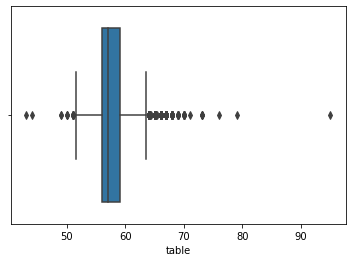

In [8]:
sns.boxplot(x=df_table);

In [9]:
# eşik degerlerin hesaplanması
Q1= df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR= Q3 - Q1
alt_sinir=Q1 - 1.5*IQR
alt_sinir
ust_sinir= Q3+ 1.5*IQR
ust_sinir


63.5

In [10]:
# aykırı deger sorgulaması
(df_table < (alt_sinir)) | (df_table>(ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [11]:
df_table<(alt_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [12]:
aykiri_tf= df_table<(alt_sinir)

In [13]:
aykiri_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [14]:
# aykırı degerlerin kendisine erismek isteyelim
aykirilar=df_table[aykiri_tf]# aykırı gözlemleri getirdik
aykirilar.index # aykiri degerlerin indeksleri

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

# Aykırı Gözlem - Tek Değişkenli Aykırı Gözlem Doldurmak
## Aykırı Deger Probleminin Çözülmesi

In [15]:
import pandas as pd

In [16]:
df_table.head()
type(df_table)
df_table.shape

(53940,)

* 1 ) eksik gözlemleri silmek - Aykırı Değerleri Silmek

In [17]:
temiz_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir)))]

In [18]:
temiz_df_table.shape # temizleme islemi sonrası 53335 gözlem kaldı

(53335,)

* 2 ) Aykırı Değerleri Ortalama ile Doldurma

In [19]:
df_table= df["table"].copy()

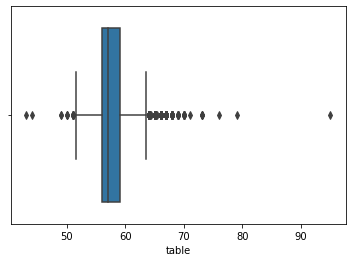

In [20]:
sns.boxplot(x=df_table)

In [21]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [22]:
# ortalamayı aykırı degerlerin yerine atama yaparız
df_table.mean()

57.45718390804603

In [23]:
df_table[aykiri_tf]=df_table.mean()

In [24]:
df_table[aykiri_tf] # aykırı degerlerin yerini ortalama degeri aldı

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

* 3) Aykırı Değerleri Baskılama Yöntemi ile Doldurmak


In [25]:
df_table= df["table"].copy()
# Aykırı degerleri sınır noktaları olan eşik degerlerine baskılama yaparız
# alt sınırdan ve üst sınırdan aykırı gözlem oldugu icin baskılamayı alt ve üst sınır olacak sekilde yaparız

In [26]:
aykiri_tf=df_table <(alt_sinir)

In [27]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [28]:
df_table[aykiri_tf]= alt_sinir

In [29]:
df_table[aykiri_tf]# alt sinirla baskılamıs olduk

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [30]:
# üst sınırdaki aykırı gözlemleri belirlemiş oldugumuz üst sınır esik degeri ile baskılama yaparız.

aykiri_tf=df_table > (ust_sinir)
df_table[aykiri_tf]=ust_sinir

# Çok Değişkenli Aykırı Gözlem Analizi

In [31]:
# Kümleme yaklasımı , local outlier factor yaklasımı gibi yaklasımlar 
# ve buna benzer yaklasımlar kullanılmaktadır.

## Local Outlier Factor

In [32]:
# gözlemleri yogunluk temelli skorluyor
# bir degerin cevresi yogun değilse demek ki bu deger aykırı
# degerdir yorumu yapılıyo.(komsuluk yapısı söz konusudur)

### LOF Teorisi ve Yapay Veri Seti Oluşturma

In [33]:
from IPython.display import Image
#Image(filename="lof_intuition.png",width=400,height=400)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
# r_ ifadesi index problemine takılmadan daha hızlı
# veriseti olusturmak icin kullanılır
np.random.seed(42)
X_inliers =np.random.normal(70,3,(100,2))
X_inliers=np.r_[X_inliers +10,X_inliers -10]
print(X_inliers.shape)
print(X_inliers[:3,:2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [35]:
X_outliers=np.random.uniform(low=15,high=130,size=(20,2))

In [36]:
X= np.r_[X_inliers,X_outliers]

In [37]:
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

* LOF Skorlarının Hesaplanması

In [38]:
LOF=LocalOutlierFactor(n_neighbors=20,
                          contamination=0.1)

In [39]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [40]:
# her bir gozlem icin skorlama islmei yapıcak
X_score=LOF.negative_outlier_factor_

In [41]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [42]:
X_score.mean()

-1.6850227435158005

In [43]:
X_score.std()

2.140119050235338

In [44]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

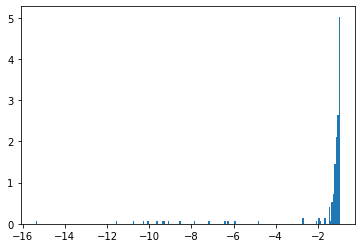

In [45]:
plt.hist(X_score,bins="auto",density=True)
plt.show()

* Aykırı Gözlemlerin Görselleştirilmesi

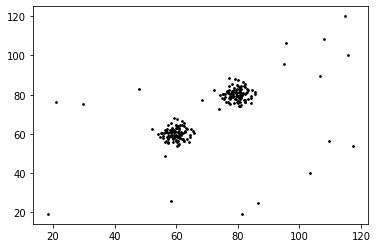

In [46]:
plt.scatter(X[:,0],X[:,1],color="k",s=3,label="Gözlem Birimeri")

In [47]:
radius=radius=(X_score.max()-X_score)/ (X_score.max()-X_score.min()) 

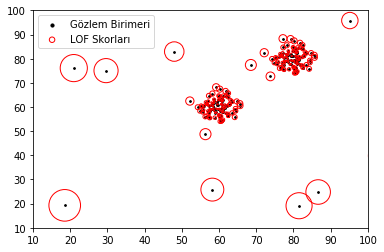

In [48]:
plt.scatter(X[:,0],X[:,1],color="k",s=3,label="Gözlem Birimeri")
plt.scatter(X[:,0],X[:,1],s=1000*radius,edgecolors='r',
           facecolors='none',label='LOF Skorları')
plt.xlim((10,100))
plt.ylim((10,100))

legend=plt.legend(loc="upper left")

legend.legendHandles[0]._sizes=[10]
legend.legendHandles[1]._sizes=[30]

## Çok Değişkenli Aykırı Gözlemlerin Yakalanması

In [49]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [50]:
# Lof bize çeşitli skorlar verdi.
# Bu skorlara gidip kendimize bir eşik deger çizelim

In [51]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [52]:
# X_score icindeki 9. degeri esik deger olarak atıycaz

esik_deger= np.sort(X_score)[9]
esik_deger

-8.512759037993277

In [53]:
(X_score > esik_deger)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [54]:
tf_vector=(X_score > esik_deger)
tf_vector[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [55]:
X[X_score>esik_deger] # aykırı gözlemlerden arınms hali
X[X_score<esik_deger] # aykırı gözlemlerin kendisi

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [56]:
X[~ tf_vector] # aykırı özlemlere bu sekildede erisebiliriz

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [57]:
X[200:220]

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [58]:
# Buradaki 46 degeri tek başına aykırı bir gozlem degildir.
# Çok değişkenli olarak ele alındıgında aykırı gözlem içinde bulunabilir.

# Çok Değişkenli Aykırı Gözlemlerin Doldurulması

## Aykırı Gözlem Problemini Çözmek

### Aykırı Gözlemleri Silmek

In [59]:
import numpy as np
df = X[X_score > esik_deger] # aykrı degerlerden arındırılmıs degerleri df icine attık

In [60]:
df[0:10]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

### Aykırı Gözlemleri Ortalama ile Doldurma

In [61]:
df_X=X.copy()

In [62]:
np.mean(df_X[0])# 1. degiskenin ortalaması
np.mean(df_X[1])# 2. degiskenin ortalaması

83.25607759176307

In [63]:
aykirilar=df_X[X_score < esik_deger] # aykrıı gözlemlerimiz 

In [64]:
aykirilar[:,:1]= np.mean(df_X[0]) # 1.gözlemi ortalama ile doldurduk

In [65]:
aykirilar[:,1:2]=np.mean(df_X[1])
aykirilar[:,1:2]

array([[83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759]])

In [66]:
df_X[X_score < esik_deger]=aykirilar
df_X[X_score < esik_deger]
# Suan aykırıları ortalama yönteme göre doldurmus olduk

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

## Aykırı Gözlemleri Baskılama ile Değiştirmek

In [67]:
df_X=X.copy()
df_X[X_score < esik_deger]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [68]:
df_X[X_score== esik_deger]

array([[58.19203955, 25.80792308]])

In [69]:
df_X[X_score < esik_deger]=df_X[X_score== esik_deger]

In [70]:
# esik deger kullanarak baskılama yöntemiyle
# yerlerine doldurmus olduk
df_X[X_score < esik_deger]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

# Eksik Veri Analizi

 * İncelenen veri setindeki gözlemlerde eksiklik
    olması durumunu ifade etmektedir.

## Eksik Veri Adımları
* Eksik verinin belirlenmesi
* Yapısının görsel teknikler ile incelenmesi
* Eksikliğin rassallığının test edilmesi
* Uygun yöntemler ile doldurulması

### Eksik Veriyi Direk Silmenin Zararları
 - Eksik degere sahip gözlemerin veri setinden direk çıkarılması ve rassallığının incelenmemesi yapılacak istatiksel çıkarımların,modelleme çalışmalarının güvenilirliğini düşürecektir.(Alpar,2011)
 

- Eksik gözlemlerin veri setinden direk çıkarılabilmesi için veri setindeki eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen raslantısal olarak oluşmuş olması gerekmektedir. Eğer eksiklikler değişkenler ile ilişkili olarak ortaya çıkan yapısal problemler ile meydana gelmiş ise bu durumda yapılacak silme işlemleri ciddi yanlılıklara sebep olabilecektir(Tabachnick ve Fidell,1996)

* örn:  kredi kartı harcaması ve kredi kartı var mı yok mu bilgisi.
    kredi kartı olmayan birisinin kredi kartı harcama bilgisinin eksik gözlemi doldurma islemi 
    yapamayız

1) Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir

- bu eksiklik baska bir degiskene bağlıdır yorumu yapılır

2) NA her zaman eksiklik anlamına gelmez

- kisi her ay harcama yapmak zorunda değildir.harcama yapmadıgı icin degiskrn durumu na olarak dönmelidir

3) Bilgi Kaybı !

## Eksik Veri Türleri Nelerdir?
* Tümüyle Raslantısal Kayıp 
    - Diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele olusan gözlemler
* Raslantısal Kayıp
    - Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü
* Raslantısal Olmayan Kayıp
    - Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü

    

## Eksik Veri Rassallığının Testi

* Elimizde eksik değer var ise bu eksikliğin rassallığının testini uygulamamız gerekir.
        - Bağımsız iki örneklem t testi
        - Korelasyon Testi
        - Little'nin MCAR testi

## Eksik Veri Problemi Nasıl Giderilir?
* Silme Yöntemleri
    - Gözlem ya da değişken silem yöntemi
    - Liste bazında silme yöntemi(Listwise Method)
    - Çiftler bazında silme yöntemi(Pairwise Method)
* Değer Atama Yöntemleri
    - Ortanca,ortalama,medyan
    - En benzer Birime Atama(hot deck)
    - Dış Kaynaklı Atama
* Tahmine Dayalı Yöntemler
    - Makine Öğrenmesi
    - EM
    - Çoklu Atama Yöntemi

# Eksik Gözlem Hızlı Çözüm

## Eksik Veri Hızlı Çözüm

In [71]:
import numpy as np
import pandas as pd


V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2= np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3= np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df= pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


* Direk Silme İşlemi

In [72]:
df.isnull().sum() # her bir degiskendeki eksik deger sayisi

V1    2
V2    3
V3    2
dtype: int64

In [73]:
df.dropna()# sadece bir tanesinde bile eksik gözlem varsa onu direk siler

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [74]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [75]:
dff=df.dropna()# atama yaparak silersek tamamen silinir

In [76]:
dff

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [77]:
dff.isnull().sum()# eksik olan gözlemler silindi

V1    0
V2    0
V3    0
dtype: int64

* Basit Değer Atama ile Doldurma 

In [78]:
df["V1"].mean()

6.0

In [79]:
df["V1"].fillna(df["V1"].mean())# na olanları ortalama ile doldur

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [80]:
df["V1"].fillna(0) # eksik değerlerin yerini 0 ile doldur

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [81]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)# bütün degişkenleri dolas ve na olanları ortalama ile doldur

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


# Eksik Gözlemleri Saptamak

In [82]:
import numpy as np
import pandas as pd


V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2= np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3= np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df= pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [83]:
df.shape

(9, 3)

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,7.0,6.000000,5.000000,1.0,2.0,6.0,8.00,15.0
V2,6.0,6.166667,3.656045,2.0,3.5,6.0,7.75,12.0
V3,7.0,11.000000,9.729680,2.0,5.5,7.0,13.00,31.0


In [85]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

In [86]:
df.notnull().sum()# bütün degiskenlerdeki tam değer sayısına erismis olduk

V1    7
V2    6
V3    7
dtype: int64

In [87]:
df.isnull().sum() # tüm değişkenlerdeki eksik değer sayısı

V1    2
V2    3
V3    2
dtype: int64

In [88]:
df.isnull().sum().sum() # toplam eksiklik sayısına erismis olduk

7

In [89]:
df.isnull()# her bir vektördeki eksik olma durumu true false olarak verilir

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [90]:
# en az bir tane eksik deger içeren tüm gözlemler
df[df.isnull().any(axis=1)] # kendisinde en az bir tane eksik deger olan gözlem birimlerini getirir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [91]:
# tüm degerleri tam olan gözlemlere erismek istersek
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [92]:
# amelasyon yöntemi :) 
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull() ]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Eksik Veri Görsellestirme ve Rassallık İncelemesi

### Görsellestirme 

In [93]:
!pip install missingno

In [94]:
import missingno as msno

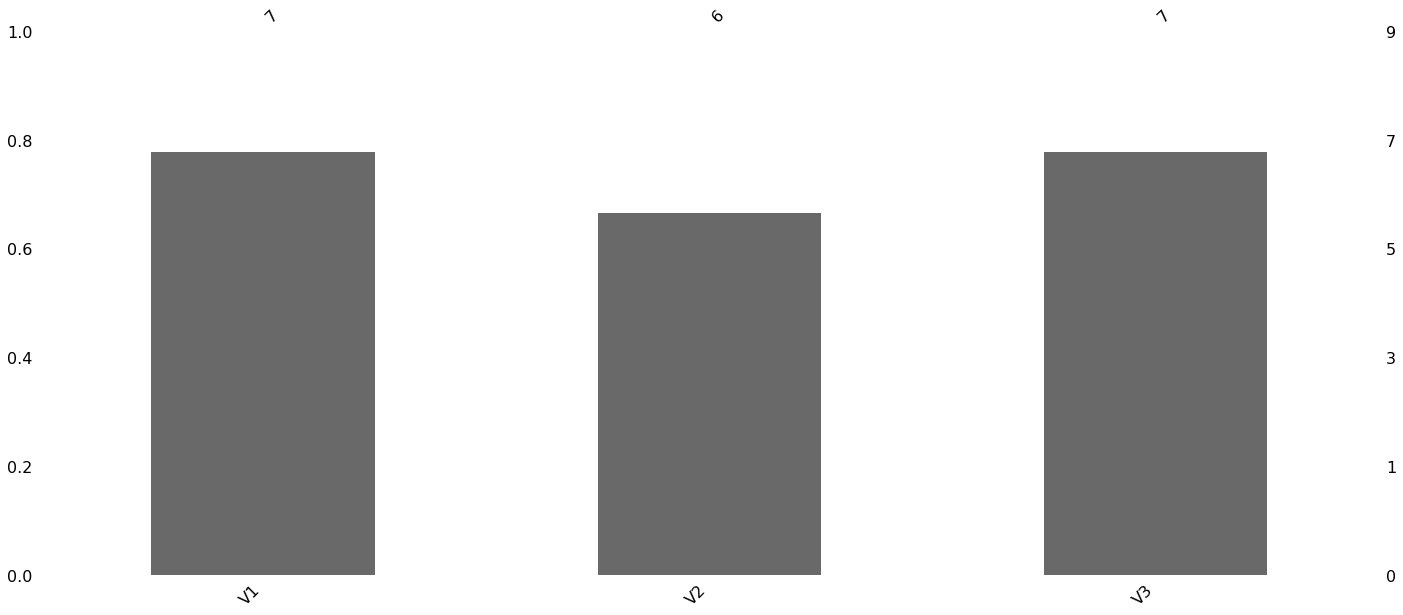

In [95]:
msno.bar(df)

In [96]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [97]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [98]:
import seaborn as sns

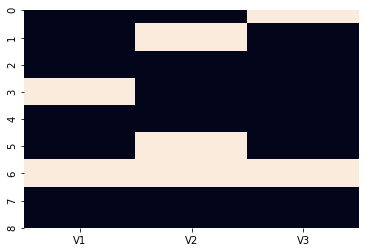

In [99]:
# eksik olan gözlemleri heatmap yardımıyla görebiliriz
sns.heatmap(df.isnull(),cbar=False)


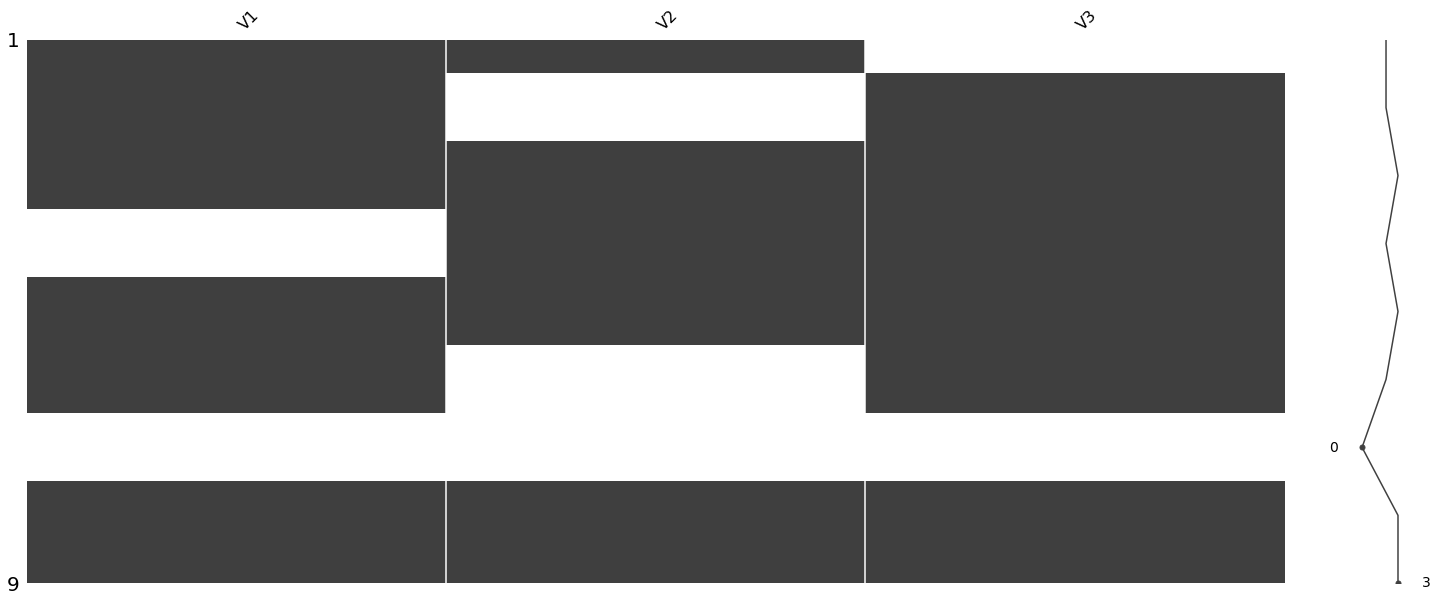

In [100]:
msno.matrix(df)

In [101]:
# Daha karmasık yapıda olan planets veri setiyle eksiklikleri inceleyelim
df=sns.load_dataset("planets").copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


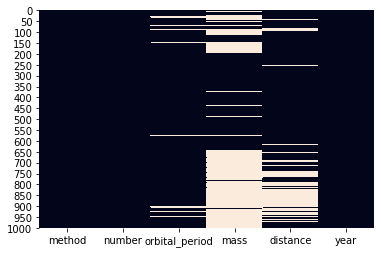

In [102]:
sns.heatmap(df.isnull(),cbar=False)

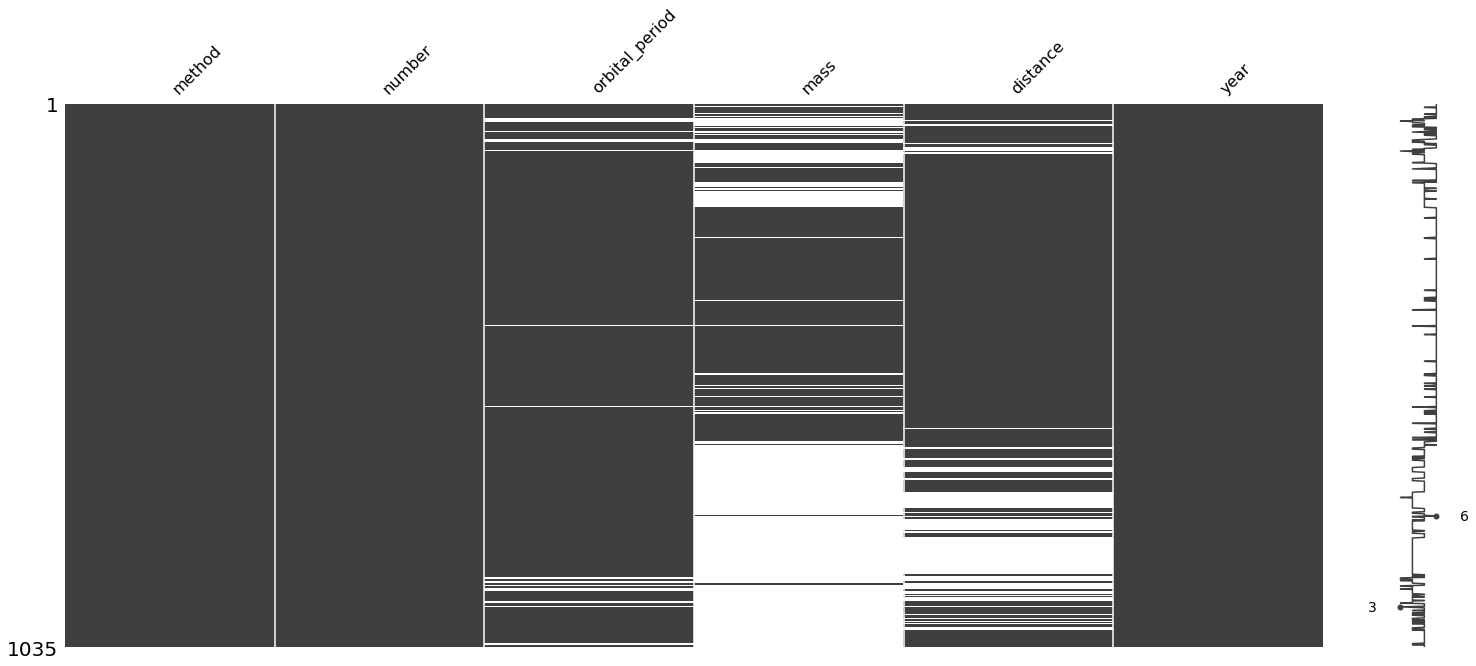

In [103]:
msno.matrix(df)

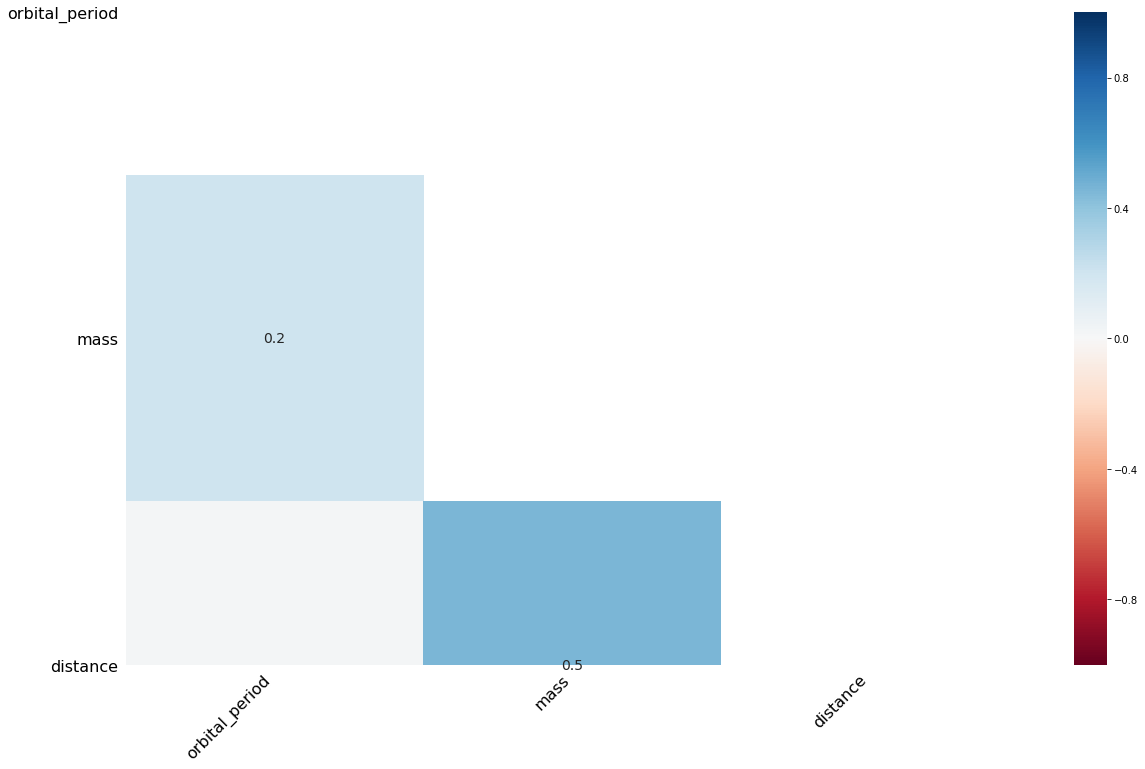

In [104]:
# degiskenlerin eksiklik anlamında birbirlerini nasıl etkilediklerini gösterir
msno.heatmap(df)

In [105]:
# Grafikten cıkarılacak sonuc distance değişkeni ile mass değişkeni arasında 
# orta şiddetli(0.5) pozitif korelasyon vardır.
# Yani mass de eksiklik görüldüğünde %50 distance da da eksiklik gözükecektir.Aralarında böyle 
# bir bağımlılık vardır.

* Elimizde bir zaman serisi oldugunu düsünelim

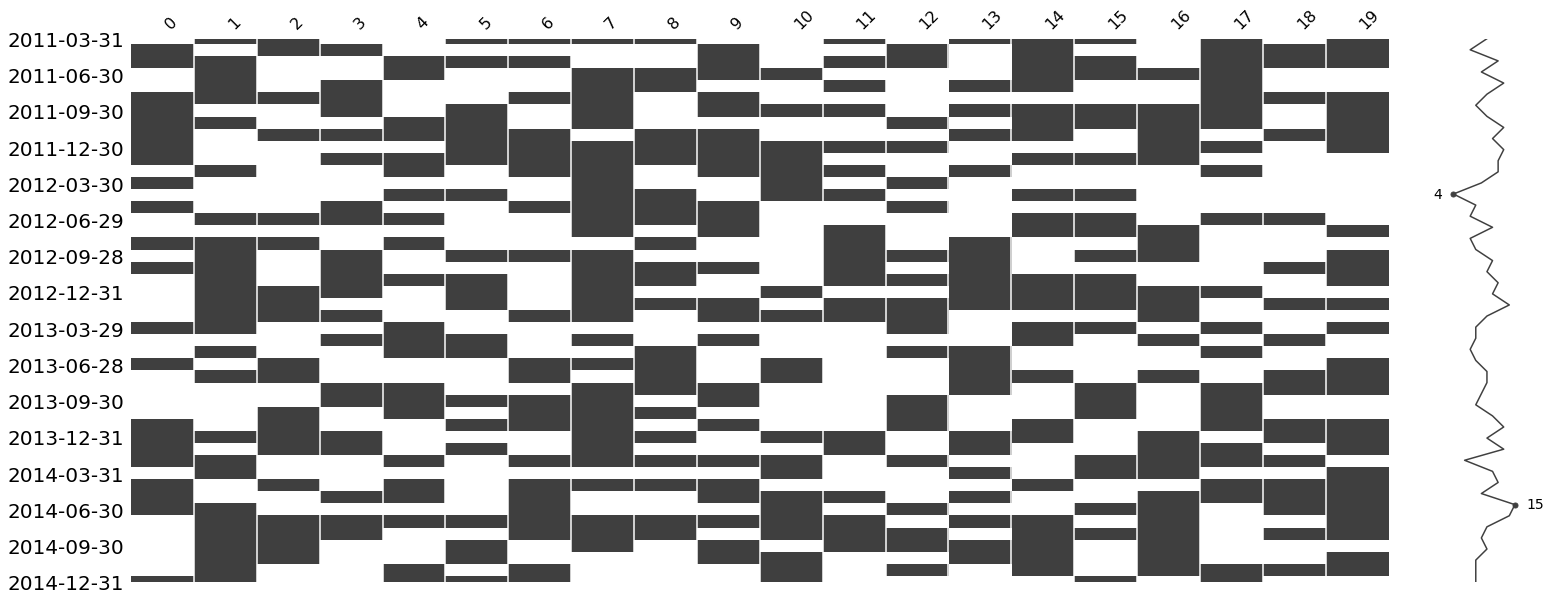

In [106]:
# misingno kütüphanesi dökümantasyonu
null_pattern=(np.random.random(1000).reshape((50,20)) >0.5).astype(bool)
null_pattern= pd.DataFrame(null_pattern).replace({False:None})
msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011','2/1/2015',freq='M')),freq='BQ');

# Eksik Veri Silme Yaklasımları

## Silme Yöntemleri

In [107]:
import numpy as np
import pandas as pd


V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2= np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3= np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df= pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [108]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [109]:
dff= df.dropna()

In [110]:
dff

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [111]:
df.dropna(how="all")# aynı anda na olanların silme isleminin gerceklestirilmesi

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [112]:
df.dropna(axis=1) # en az bir tane eksik deger olması durumunda sil

""
0
1
2
3
4
5
6
7
8


In [113]:
df["V1"][[3,6]]=99# 3. ve 6. indekse 99 degerini atadık

In [114]:
df.dropna(axis=1)# en az bir tane eksik gözlem olması durumunda sil

,V1
0,1.0
1,3.0
2,6.0
3,99.0
4,7.0
5,1.0
6,99.0
7,9.0
8,15.0


In [115]:
df.dropna(axis=1,how="all")# aynı anda bütün gözlemlerde na oldugunda silme 
# islemini gerceklestirir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [116]:
df["sil_beni"]=np.nan# bütün degerleri na den olusan bir degisken olusturduk

In [117]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,99.0,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,99.0,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [118]:
# inplace=True olması kalıcı degisiklik olması icin
df.dropna(axis=1,how="all",inplace=True)

In [119]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Basit Deger Atama Yöntemleri

In [120]:

V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2= np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3= np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df= pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [121]:
df["V1"].fillna(0)# eksik olan degerleri 0 degeri ile doldurmak

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [122]:
df["V1"].fillna(df["V1"].mean())# eksik olan degerleri ortalama ile doldurmak

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [123]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [124]:
df.fillna(df.mean()[:])#her bir degiskeni kendi ortalaması ile doldurmak

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [125]:
df.fillna(df.mean()["V1":"V2"])# v1 ve v2 yi ortalama ile
df.fillna(df.median()["V3"])# v3 ise ortanca ile doldurduk

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [126]:
df.where (pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [127]:
V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2= np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3= np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4=np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df= pd.DataFrame({
    "maas":V1,
    "V2":V2,
    "V3":V3,
    "departman":V4
})
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [128]:
# DİKKAT:  Atama islemi yapmadan önce kategorik degiskenlere göre sürekli degiskenin kırıp
# sonrasında doldurma islemini gerceklestirmem gerekir

In [129]:
df.groupby("departman")["maas"].mean()
# IK nın maas ortalaması 4 civarı
# IT nin maas ortalması 7 civarı

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [130]:
# departman ortalamalarına göre maas degiskenindeki eksik gözlemleri dolduralım
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik Degiskenlerde Deger Atama 

In [131]:
# Kategorik degiskenlerde na olması durumunda ne yaparız?

In [132]:
V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2= np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3= np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4=np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df= pd.DataFrame({
    "maas":V1,
    "V2":V2,
    "V3":V3,
    "departman":V4
})
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [133]:
df.isnull()# eksik deger yok bilgisi gözüküyor !
# ama bizim kategorik degiskenimizde bir tane eksik degerimiz var
# kategorik degisken icinde yer alan na degerini string bir ifade olarak tanıdı
# na olarak almadı

,maas,V2,V3,departman
0,False,False,True,False
1,False,True,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,True,True,True,False
7,False,False,False,False
8,False,False,False,False


In [134]:
df.groupby("departman")["departman"].count()

departman
IK     5
IT     3
nan    1
Name: departman, dtype: int64

* basit atama yöntemiyle kategorik degiskenin eksikliğini doldurmak

In [135]:
df.departman.loc[df.departman=="nan"]="IK"

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [136]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [137]:
df.departman[0]= df.V3[0]

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [139]:
df.groupby("departman")["departman"].count()

departman
IK    6
IT    2
Name: departman, dtype: int64

In [140]:
df.departman.fillna(df["departman"].mode())# en sık tekrar eden degeri
# kategorik degiskenin sınıfı olarak atadı.

0    IK
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## Zaman Serilerinde Atama İslemi

In [141]:
V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2= np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3= np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4=np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df= pd.DataFrame({
    "maas":V1,
    "V2":V2,
    "V3":V3,
    "departman":V4
})
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [142]:
# Bir önceki değer yada bir sonraki deger ile doldurma yapılabilir
# Yada bir önceki ve bir sonraki degerin ortalaması ile doldurulabilir

In [143]:
df["maas"].interpolate()# 3.indekse bir önceki deger ile bir sonraki degerin ortalamasını koyduk

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [144]:
df["maas"].fillna(method="bfill")# ilerdeki deger ile doldurmus

0     1.0
1     3.0
2     6.0
3     7.0
4     7.0
5     1.0
6     9.0
7     9.0
8    15.0
Name: maas, dtype: float64

## Tahmine Dayalı Deger Atama - KNN & Random Forests & EM
### Eksik Gözlemleri Tahmine Dayalı Yöntemlerle Doldurma

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


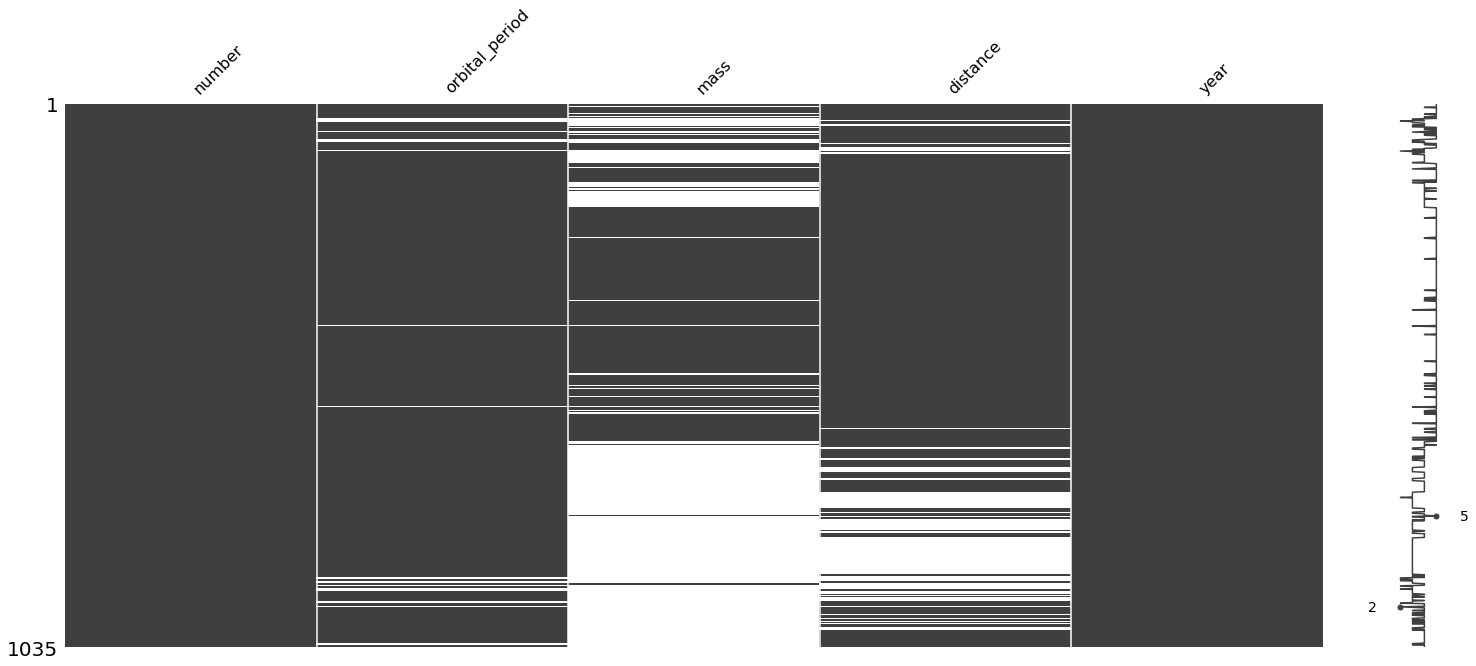

In [145]:
import seaborn as sns
df=sns.load_dataset('planets').copy()
df=df.select_dtypes(include=['float64','int64'])
print(df.isnull().sum())
msno.matrix(df)

In [146]:
# tahmine dayalı yöntemle doldurmak için fancyimpute kütüphanesi indirilir
#!pip install fancyimpute

In [149]:
from fancyimpute import KNN

Using TensorFlow backend.


In [147]:
import pandas as pd

In [148]:
var_names=list(df)

## KNN ile Doldurma

In [150]:
knn_imp= KNN(k=5).fit_transform(df);

Imputing row 1/1035 with 0 missing, elapsed time: 0.265
Imputing row 101/1035 with 1 missing, elapsed time: 0.269
Imputing row 201/1035 with 0 missing, elapsed time: 0.272
Imputing row 301/1035 with 0 missing, elapsed time: 0.273
Imputing row 401/1035 with 0 missing, elapsed time: 0.274
Imputing row 501/1035 with 0 missing, elapsed time: 0.274
Imputing row 601/1035 with 0 missing, elapsed time: 0.276
Imputing row 701/1035 with 2 missing, elapsed time: 0.280
Imputing row 801/1035 with 2 missing, elapsed time: 0.286
Imputing row 901/1035 with 2 missing, elapsed time: 0.293
Imputing row 1001/1035 with 1 missing, elapsed time: 0.300


In [151]:
knn_imp[0:10]# array

array([[1.00000000e+00, 2.69300000e+02, 7.10000000e+00, 7.74000000e+01,
        2.00600000e+03],
       [1.00000000e+00, 8.74774000e+02, 2.21000000e+00, 5.69500000e+01,
        2.00800000e+03],
       [1.00000000e+00, 7.63000000e+02, 2.60000000e+00, 1.98400000e+01,
        2.01100000e+03],
       [1.00000000e+00, 3.26030000e+02, 1.94000000e+01, 1.10620000e+02,
        2.00700000e+03],
       [1.00000000e+00, 5.16220000e+02, 1.05000000e+01, 1.19470000e+02,
        2.00900000e+03],
       [1.00000000e+00, 1.85840000e+02, 4.80000000e+00, 7.63900000e+01,
        2.00800000e+03],
       [1.00000000e+00, 1.77340000e+03, 4.64000000e+00, 1.81500000e+01,
        2.00200000e+03],
       [1.00000000e+00, 7.98500000e+02, 8.62177075e-01, 2.14100000e+01,
        1.99600000e+03],
       [1.00000000e+00, 9.93300000e+02, 1.03000000e+01, 7.31000000e+01,
        2.00800000e+03],
       [2.00000000e+00, 4.52800000e+02, 1.99000000e+00, 7.47900000e+01,
        2.01000000e+03]])

In [152]:
dff=pd.DataFrame(knn_imp)# dataframe' e cevirdik

In [154]:
dff.head()# suan bos olan gözlemler dolduruldu 
# ama degisken isimleri gitt

,0,1,2,3,4
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [157]:
dff.columns=var_names
dff.columns

Index(['number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [158]:
dff.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [160]:
dff.isnull().sum()# eksik gözlemler ortadan kalktı

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [161]:
# tahmine dayalı yöntemle doldurmak için kullanılan diğer bir kütüphane ise
# ycimpute kütüphanesidir.
!pip install ycimpute

In [163]:
from ycimpute.imputer import knnimput #yine knn ile bir doldurma islemi gerceklestirecegiz

In [164]:
var_names=list(df)# sütun isimlerini var_names de tuttuk

In [165]:
n_df=np.array(df)

In [167]:
n_df.shape# numpy arrayine cevirdik

(1035, 5)

In [169]:
dff=knnimput.KNN(k=4).complete(n_df)

Imputing row 1/1035 with 0 missing, elapsed time: 0.235
Imputing row 101/1035 with 1 missing, elapsed time: 0.246
Imputing row 201/1035 with 0 missing, elapsed time: 0.250
Imputing row 301/1035 with 0 missing, elapsed time: 0.250
Imputing row 401/1035 with 0 missing, elapsed time: 0.250
Imputing row 501/1035 with 0 missing, elapsed time: 0.250
Imputing row 601/1035 with 0 missing, elapsed time: 0.250
Imputing row 701/1035 with 2 missing, elapsed time: 0.256
Imputing row 801/1035 with 2 missing, elapsed time: 0.256
Imputing row 901/1035 with 2 missing, elapsed time: 0.266
Imputing row 1001/1035 with 1 missing, elapsed time: 0.276


In [170]:
dff=pd.DataFrame(dff,columns=var_names)

In [172]:
dff.isnull().sum()# bos olan yerler knn ile dolduruldu

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [173]:
dff.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


## Random Forest ile Doldurma 

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


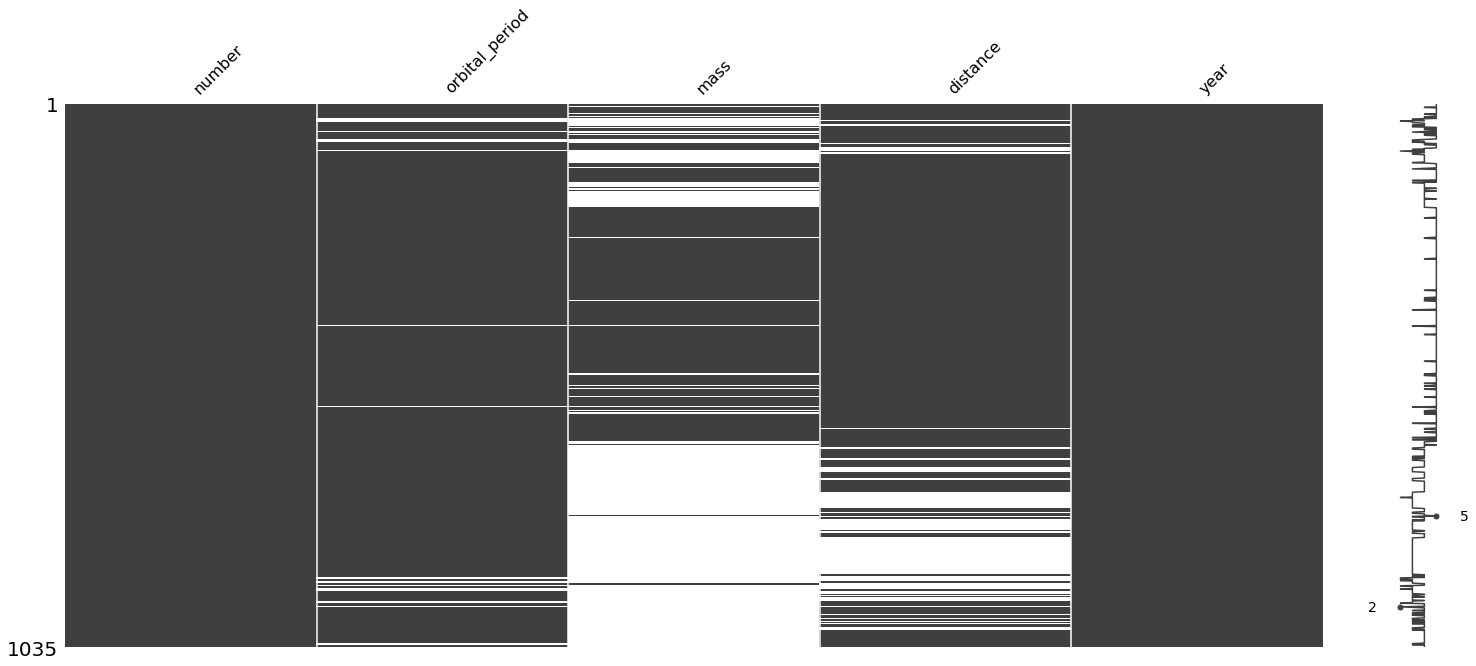

In [176]:
import seaborn as sns
df=sns.load_dataset('planets').copy()
df=df.select_dtypes(include=['float64','int64'])
print(df.isnull().sum())
msno.matrix(df)

In [178]:
from ycimpute.imputer import iterforest# ycimpute icerisinden iterforest kütüphanesini kullanıcaz

In [179]:
var_names=list(df)

In [187]:
n_df=np.array(df)
n_df[0:2]

array([[1.00000e+00, 2.69300e+02, 7.10000e+00, 7.74000e+01, 2.00600e+03],
       [1.00000e+00, 8.74774e+02, 2.21000e+00, 5.69500e+01, 2.00800e+03]])

In [181]:
dff=iterforest.IterImput().complete(n_df)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [182]:
dff=pd.DataFrame(dff,columns=var_names)

In [183]:
dff.isnull().sum()# random forest ile tahmine dayalı bie sekilde atama islemini gerceklestirdik

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

## EM ile Atama

In [193]:
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [194]:
from ycimpute.imputer import EM

In [195]:
var_names=list(df)
n_df=np.array(df)
dff= EM().complete(n_df)

In [197]:
dff=pd.DataFrame(dff,columns=var_names)

In [198]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [199]:
# Hangi Yöntem Daha iyi? 
# knn de k sayısı kactır
# random forest da kac agac kullanılacak gibi sorular olabilir.
# eksik olmayan veride suni eksiklikler ekleyip bu algoritmaları deneyebilir 
# daha sonra hangisi daha iyi doldurma işlemi yapıyosa eksiklik olan yerde iyi sonuc veren
# algoritma denenebilir.

# Veri Standardizasyonu & Değişken Dönüşümü
    -Veri Standardizasyonunda varyasyon korunur ama ölçek değişir.
    -Değişken Dönüşümünde ise bazen ölçek korunur bazen ise bozulmus olur

## Standartlaştırma
    - Standart sapması 1, ortalaması 0 olacak sekilde standartlastırıyor

In [201]:
import numpy as np
import pandas as pd
V1=np.array([1,3,6,5,7])
V2=np.array([7,7,5,8,12])
V3=np.array([6,12,5,6,14])

df=pd.DataFrame({"V1":V1,
                "V2":V2,
                "V3":V3})
df=df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [203]:
from sklearn import preprocessing

In [205]:
# orjinal veriseti etkilenmez scale yaptıgımızda
dff=preprocessing.scale(df)
# ortalaması 0 standart sapması bir olacak sekilde bir standartlastırma islemi yaptık

In [208]:
dff

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

## Normalizasyon 
    - Bir degiskenin degerlerini 0 ve 1 aralıgına dönüstürmek 

In [210]:
preprocessing.normalize(df)# 0 ile 1 aralıgına dönüstürüyor

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min - Max Dönüşümü
    - Bir degiskenin degerlerini istedigimiz iki aralık arasına dönüstürmek için kullanılır

In [212]:
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))

In [213]:
scaler.fit_transform(df)# 10 ile 20 arasındaki degerlere dönüstürdü

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Binarize Dönüsüm
    - Belli bir eşik değere göre değişkenin değerlerini 0 yada 1 e dönüştürür.
    - Bu dönüşüm verisetinin standartlaştırılması değil değişkenin dönüştürülmesi işlemidir. Taşımış oldugu bilgiyi etkilemektedir.

In [214]:
binarizer=preprocessing.Binarizer(threshold=5).fit(df)

In [216]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

## 0 - 1 Dönüşümü
    - Belirli bir kategorik değişkenin sürekli değişkene çevrilmiş oluyor. Yani 0 ve 1 e dönüştürülerek numeric hesaplamalarda kullanılabilir hale getirilmis oluyor.

In [217]:
import seaborn as sns
tips=sns.load_dataset('tips')
df=tips.copy()
print(df.head())
df_l=df.copy()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [219]:
df_l.head()
# amac iki sınıflı kategorik degiskeni binary 0 yada 1 hale getirmek

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [222]:
# 1. yaklasım
df_l["yeni_sex"]=df_l["sex"].cat.codes# yeni eklenen degisken 0 ve 1 den olusuyor

In [223]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [226]:
# 2.yaklasım
# baska kullanacagımız yaklasım: kategorik degiskeni 0 ve 1 haline dönüstürme
lbe=preprocessing.LabelEncoder()

In [227]:
df_l["daha_yeni_sex"]= lbe.fit_transform(df_l["sex"])

In [228]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [ ]:
# Dikkat: 1.yaklasımda cat.codes ile ilk yakaladıgı sınıfı 1 ile baslatır.
# 2. yaklasımda ise ilk yakaladıgı sınıfı 0 ile baslatır
# Yani bu çok dikkat edilmesi gereken bir noktadır.

## 1 ve Diğerleri(0) Dönüşümü
    - Buda 2 den fazla sınıfa sahip kategorik değişkenin sınıflarını
    - 1  ve diğerleri şeklinde dönüştürmek için kullanılır

In [ ]:
# Mesela istanbul ve diğerleri gibi düşünülebilir
# Yada istanbul,izmir,ankara ve diğerleri gibi de düşünülebilir

In [229]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [231]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [236]:
df_l["yeni_gun"]=np.where(df_l["day"].str.contains("Sun"),1,0)# day icinden Sun olanlara 1 diğerlerine 0 ver 

In [235]:
df_l.tail()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yeni_gun
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0
243,18.78,3.00,Female,No,Thur,Dinner,2,1,0,0


## Çok Sınıflı Dönüşüm
    -Var olan sınıf sayısı kadar dönüştürmeyi gerceklestirir

In [238]:
lbe=preprocessing.LabelEncoder()

In [239]:
df_l["daha_yeni_gun"]=lbe.fit_transform(df_l["day"])

In [240]:
df_l

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yeni_gun,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0,1


* Not: Bu dönüsümde algoritmaların kafası karısmakta ve kategorik degiskenlerin sınıflarının bagımlı degiskene olan etkileri bozulmaktadır. Bu sebeple **one-hot encoding** adı verilen bir dönüşüm yapmak gerekmektedir.

* Nominal bir ölcek türüyle ölcülen ve etkileri kendi icinde esit olan bir kategorik degiskenin etkilerini biz bozmus olduk. Nominal durumdayken herhangi bir sınıf farkı olmamasına rağmen biz dönüsüm yaptığımızda bir anda 1 ve 3 arasında farka dönüsmüs olacak. Bu nedenle modelleme esnasında bagımlı degiskeni aldatacaktır.
* Peki elimizdeki kategorik degisken ordinal oldugunda nasıl olur?   

Bu durumda bu dönüsüm yaklasımını , kategorik degiskeni sürekli degiskene cevirmek üzere kullanılabilir. Sonucta sınıflar arasındaki farkındalık korunmus olacaktır.

## One - Hot Dönüşümü ve Dummy Değişken Tuzağı


### İki sınıflı one -hot encoding dönüsümü

In [241]:
df_one_hot=df.copy()

In [242]:
pd.get_dummies(df_one_hot,columns=["sex"],prefix=["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


* Burada cinsiyet bilgisini tasıyan 2 degisken var.
* Normal sex değiskeni olsaydı aynı bilgiyi tasıyan 3 degisken veri setindebulunmus olacaktı.
* One - hot üzerinden olusturulan yeni değişkenler eğer birbirleri üzerinden olusturulabiliyor ise bu duruma **dummy degisken tuzağı** adı verilir

* Bu dummy değişken tuzağının farkında olup aynı şeyi ifade eden değişkenlerden birini uçurmak gerekir.

### iki den fazla sınıfta one - hot encoding dönüsümü

In [243]:
pd.get_dummies(df_one_hot,columns=["day"],prefix=["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


##  Sürekli Değişkeni Kategorik Değişkene Çevirme

In [245]:
df.head()
# total_bill,tip ve size sürekli değişkenlerini kategorik değişkene 
# dönüştürmek isteyelim

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [250]:
dff=df.select_dtypes(include=["float64","int64"])

In [252]:
# n_bins : 3 parçadan mı oluşacak 2 parçadan mı olusacak bilgisi
# quantile yöntemi sürekli değişkeni çeyrekliklere göre böler
est=preprocessing.KBinsDiscretizer(n_bins=[3,2,2],encode="ordinal",strategy="quantile").fit(dff)

In [253]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

In [254]:
dff.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


## Değişkeni İndexe, İndexi Değişkene Çevirmek

In [255]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [256]:
df["yeni_degisken"]= df.index# indeksi yeni degiskene ekledi

In [258]:
# yeni_degiskene 10 sayısı ekleyip
df["yeni_degisken"]= df["yeni_degisken"]+10

In [259]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [260]:
# onu yeni indeks degerleri olarak atadık
df.index=df["yeni_degisken"]

In [261]:
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='yeni_degisken', length=244)